In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
train = pd.read_csv('historic.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_no            8000 non-null   int64  
 1   category           8000 non-null   object 
 2   main_promotion     8000 non-null   object 
 3   color              8000 non-null   object 
 4   stars              8000 non-null   float64
 5   success_indicator  8000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 375.1+ KB


In [41]:
for col in ['category', 'main_promotion', 'color']:
    print ('-' * 30, col, '-'*30)
    print (train[col].value_counts())
    

------------------------------ category ------------------------------
Tunic         1650
Polo-Shirt    1546
T-Shirt       1459
Sweatshirt    1360
Blouse        1246
Hoodie         739
Name: category, dtype: int64
------------------------------ main_promotion ------------------------------
Category_Highlight     2432
Catalog                2246
Frontpage_Header       2013
Display_Ad_Campaign    1309
Name: main_promotion, dtype: int64
------------------------------ color ------------------------------
Multi-Color    1443
Blue           1244
Yellow         1056
Black           812
Red             776
Green           728
Orange          592
Brown           585
Pink            412
White           352
Name: color, dtype: int64


<AxesSubplot:xlabel='success_indicator', ylabel='count'>

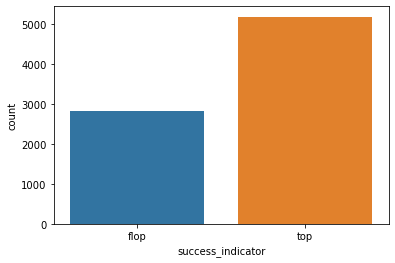

In [7]:
sns.countplot(train.success_indicator)

In [28]:
train.sample(10)

,item_no,category,main_promotion,color,stars,success_indicator
687,698244,T-Shirt,Frontpage_Header,Pink,3.8,top
1262,478671,Hoodie,Catalog,Yellow,3.7,top
2493,480065,Hoodie,Category_Highlight,Blue,2.8,top
4081,665085,Polo-Shirt,Catalog,Yellow,5.3,top
3550,233489,Tunic,Category_Highlight,Brown,3.6,top
7993,632652,T-Shirt,Catalog,Blue,3.2,top
3477,851256,Polo-Shirt,Frontpage_Header,Yellow,2.1,flop
4857,239333,Tunic,Category_Highlight,Multi-Color,4.0,top
4082,801786,Polo-Shirt,Frontpage_Header,Yellow,2.5,flop
6003,176775,Sweatshirt,Frontpage_Header,Black,5.9,top


In [36]:
train['Unisex'] = 1
train.loc[train.category.isin(['Blouse', 'Tunic']), 'Unisex'] = 0

train['Formal'] = 0
train.loc[train.color.isin(['Black', 'Blue', 'Brown', 'White']), 'Formal'] = 1


In [37]:
train.sample(3)

,item_no,category,main_promotion,color,stars,success_indicator,Unisex,Formal
3377,374235,Polo-Shirt,Catalog,Green,4.4,top,1,0
7371,858330,T-Shirt,Category_Highlight,Multi-Color,2.9,top,1,0
2504,511969,Tunic,Display_Ad_Campaign,Black,2.3,flop,0,1


In [13]:
y = train.success_indicator.apply(lambda x: 1 if x=='top' else 0)

<AxesSubplot:xlabel='stars'>

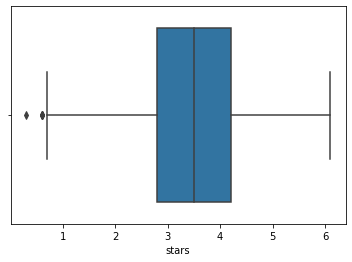

In [8]:
sns.boxplot(train.stars)

In [47]:
X = pd.concat([pd.get_dummies(train[['category', 'main_promotion', 'color']]), 
               train.stars, train.Unisex, train.Formal
              ], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=42)

rf_model = RandomForestClassifier(class_weight='balanced', oob_score=True, random_state=42)
ex_model = ExtraTreesClassifier(class_weight='balanced', random_state=42)

rf_model.fit(X_train, y_train)
ex_model.fit(X_train, y_train)

print (rf_model.score(X_test, y_test), ex_model.score(X_test, y_test))

0.804 0.7875


In [48]:
print (classification_report (y_test, rf_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.72      0.73      0.72       704
           1       0.85      0.85      0.85      1296

    accuracy                           0.80      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.80      0.80      0.80      2000

